# Pandas, Matplotlib және Seaborn көмегімен деректерді талдау

In [1]:
import numpy as np
import pandas as pd # Pandas үшін стандартты аббревиатура.
import matplotlib.pyplot as plt # Matplotlib үшін стандартты аббревиатура

Біз ``Титаник`` датасетімен жұмыс істейтін боламыз

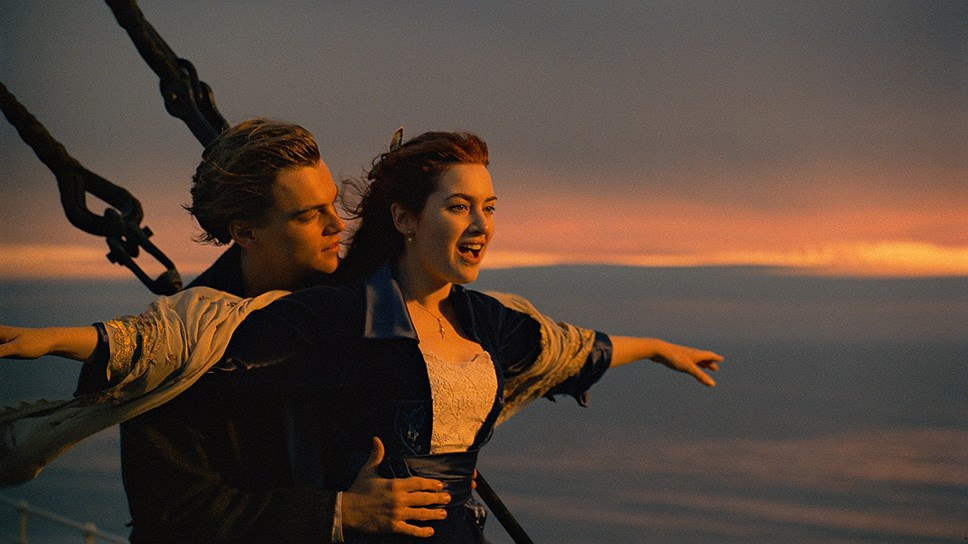


Файлдар туралы ақпарат:
 - *titanic_data.csv* онда титаник жолаушылары туралы әртүрлі ақпарат бар (билет, санат, жас және т. б.)
 - *titanic_surv.csv* бірінші файлдағы әрбір жолаушы үшін сол жолаушының аман қалғаны (1-белгі) немесе аман қалмағаны (0-белгі)туралы ақпарат бар




## Pandas кітапханасының пайдалы мүмкіндіктері

Pandas кітапханасының құжаттамасы: https://pandas.pydata.org/docs/

Мұнда іздеуде функциялардың/әдістердің атауларын іздеуге және олар туралы толық ақпаратты ашуға болады.

### Файлдан оқу
Әдетте деректер формат файлдарында кесте түрінде сақталады .csv немесе .xlsx. Бұл сабақта біз .CSV деректерді жүктейміз.



Бірінші файлды жүктейік. Оны жүктеуге сілтеме: https://drive.google.com/file/d/14NZQD5ACLEdVOnmQtvuAkE1AVizLfnoL/view?usp=drive_link

In [2]:
titanic_passengers = pd.read_csv('titanic_data.csv', index_col='PassengerId')

In [9]:
titanic_passengers.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


Баған туралы ақпарат:

- **PassengerId**: жолаушының бірегей идентификаторы
- **Pclass**: жолаушы отырған каютаның класы (1, 2 немесе 3)
- **Name**: жолаушының аты-жөні
- **Sex**: жолаушының жынысы
- **Age**: жолаушының жасы
- **SibSp**: Титаникте жолаушымен бірге жүрген бауырлары мен жұбайларының жалпы саны
- **Parch**: Титаникте жолаушымен бірге жүрген ата-аналары мен балаларының жалпы саны
- **Ticket**: жолаушының билетінің нөмірі
- **Fare**: жолаушының билет құны
- **Cabin**: жолаушының каютасының нөмірі
- **Embarked**: жолаушы Титаникке қай портта мінген:
  - **S**: Southampton
  - **C**: Cherbourg
  - **Q**: Queenstown

### Датасет туралы жалпы ақпарат алу

Біздің кестенің пішінін(shape) көрсетейік: онда қанша жолдар мен бағандар бар екендігі туралы ақпарат:

In [6]:
titanic_passengers.shape

(891, 11)

Info () әдісі ақпарат береді:
- өткізу кестесінің бағандарының әрқайсысында қанша;
- әр бағанның түрі.

In [10]:
titanic_passengers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 76.6+ KB


Әдіс .describe () әр сандық баған үшін статистика туралы ақпарат береді:
- **count**: бағандағы Nan емес мәндер саны;
- **mean**: бағандағы мәндердің арифметикалық орташа мәні;
- **std**: бағандағы мәндердің стандартты ауытқуы;
- **min**: бағандағы минималды мән;
- **25%**: 25-бағандағы мәндердің пайыздық перцентилі;
- **50%**: 50-бағандағы мәндердің пайыздық перцентилі;
- **75%**: 75-бағандағы мәндердің пайыздық перцентилі;
- **max**: бағандағы максималды мән;

In [11]:
titanic_passengers.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


### Жеке бағандармен жұмыс.

Деректердің жеке бағанын алу үшін оның атын төртбұрышты жақшаға жазу керек. Әрі қарай, бағанмен массив сияқты жұмыс істеуге болады. Мысалы, бағаннан минималды / максималды мәнді табуға болады:

In [12]:
titanic_passengers['Age'].min()

0.42

In [13]:
titanic_passengers['Age'].max(), titanic_passengers['Age'].mean(), titanic_passengers['Age'].std()

(80.0, 29.69911764705882, 14.526497332334042)

Сондай-ақ, бағанды numpy түріне аударуға және онымен қалыпты NumPy массиві ретінде жұмыс істеуге болады:

In [14]:
age_numpy = np.array(titanic_passengers['Age'])
age_numpy

array([22.  , 38.  , 26.  , 35.  , 35.  ,   nan, 54.  ,  2.  , 27.  ,
       14.  ,  4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  ,   nan,
       31.  ,   nan, 35.  , 34.  , 15.  , 28.  ,  8.  , 38.  ,   nan,
       19.  ,   nan,   nan, 40.  ,   nan,   nan, 66.  , 28.  , 42.  ,
         nan, 21.  , 18.  , 14.  , 40.  , 27.  ,   nan,  3.  , 19.  ,
         nan,   nan,   nan,   nan, 18.  ,  7.  , 21.  , 49.  , 29.  ,
       65.  ,   nan, 21.  , 28.5 ,  5.  , 11.  , 22.  , 38.  , 45.  ,
        4.  ,   nan,   nan, 29.  , 19.  , 17.  , 26.  , 32.  , 16.  ,
       21.  , 26.  , 32.  , 25.  ,   nan,   nan,  0.83, 30.  , 22.  ,
       29.  ,   nan, 28.  , 17.  , 33.  , 16.  ,   nan, 23.  , 24.  ,
       29.  , 20.  , 46.  , 26.  , 59.  ,   nan, 71.  , 23.  , 34.  ,
       34.  , 28.  ,   nan, 21.  , 33.  , 37.  , 28.  , 21.  ,   nan,
       38.  ,   nan, 47.  , 14.5 , 22.  , 20.  , 17.  , 21.  , 70.5 ,
       29.  , 24.  ,  2.  , 21.  ,   nan, 32.5 , 32.5 , 54.  , 12.  ,
         nan, 24.  ,

Сандық бағандарда [Гистограммаларды](https://ru.wikipedia.org/wiki/Гистограмма) салуға болады:

<Axes: >

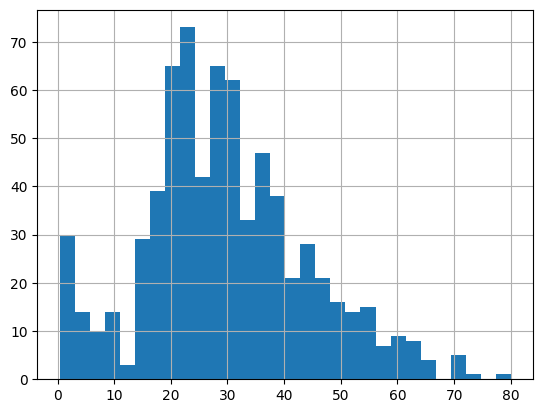

In [16]:
titanic_passengers['Age'].hist(bins=30)

Гистограммаларды matplotlib көмегімен де жасауға болады:

(array([40., 14., 15., 31., 79., 98., 85., 84., 73., 45., 35., 35., 29.,
        16., 13., 11.,  4.,  5.,  1.,  1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <BarContainer object of 20 artists>)

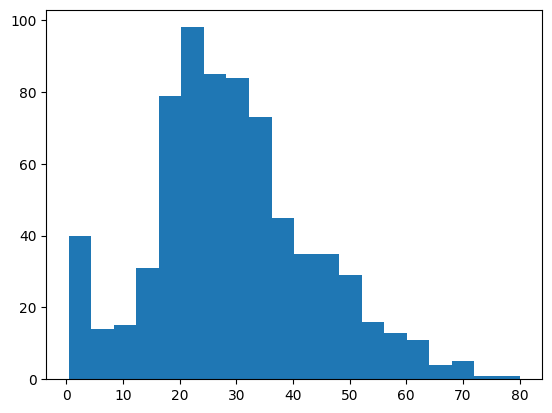

In [17]:
plt.hist(titanic_passengers['Age'], bins=20)

Value_count () әдісі бағанда кездесетін барлық бірегей мәндерді шығарады және әр мән бағанда қанша рет кездеседі. Бұл функция бірегей мәндердің саны өте көп емес бағандар үшін пайдалы.

In [18]:
titanic_passengers['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [19]:
titanic_passengers['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Age бағаны үшін value_count() әдісінің шығысы өте мазмұнды болмайды, өйткені Age бағанында бірегей мәндер тым көп. Көптеген ерекше мәндері бар мұндай бағандар үшін жоғарыда айтылғандай гистограммаларды құрған дұрыс.

In [20]:
titanic_passengers['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

### Шарттар бойынша индекстеу

Шарттар бойынша индекстеу дегеніміз-біз бүкіл кестеден белгілі бір Шартқа сәйкес келетін жолдарды ғана таңдағымыз келеді. Мысалы, Біз деректер жиынынан тек ер жолаушыларға сәйкес келетін жолдарды (яғни, секс бағанында male мәні бар жолдарды) бөлектегіміз келуі мүмкін

Ол осылай жасалады:

In [21]:
titanic_male = titanic_passengers[ titanic_passengers['Sex'] == 'male' ]

In [22]:
titanic_male.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


Titanic_male-де тек ер жолаушылар бар екеніне көз жеткізіңіз:

In [23]:
titanic_male['Sex'].value_counts()

male    577
Name: Sex, dtype: int64

Сондай-ақ, түр шарттарын қолдануға болады>,<,>=, <=:

In [25]:
titanic_passengers[ titanic_passengers['Age'] >= 18 ]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


Неғұрлым күрделі шарттарды орнатуға болады: бірнеше қарапайым шарттардың тіркесімі. Мысалы, Біз 18 жастан 22 жасқа дейінгі ер адамдарға сәйкес келетін жолдарды бөлектейміз. Яғни, біз сол жолдарды қалаймыз:

"sex бағанында male мәні және Age бағанында мән 18-ден жоғары және Age бағанында мән 18-ден төмен"

Мұны істеу үшін төртбұрышты жақшаның ішіне үш шартты да, әрқайсысын жақшаға жазып алу керек. Шарттар арасында & белгісін қойыңыз (ол "және" дегенді білдіреді)

In [29]:
asd=titanic_passengers[(titanic_passengers['Age'] > 18) & (titanic_passengers['Age'] < 35) & (titanic_passengers['Sex'] == 'male')]
asd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    228 non-null    int64  
 1   Name      228 non-null    object 
 2   Sex       228 non-null    object 
 3   Age       228 non-null    float64
 4   SibSp     228 non-null    int64  
 5   Parch     228 non-null    int64  
 6   Ticket    228 non-null    object 
 7   Fare      228 non-null    float64
 8   Cabin     26 non-null     object 
 9   Embarked  228 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 19.6+ KB


Сондай-ақ, шарттарды немесе көмегімен біріктіруге болады. Бұл белгі |

In [30]:
titanic_passengers[(titanic_passengers['Pclass'] == 1) | (titanic_passengers['Pclass'] == 2)]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
12,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...
881,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
884,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


"Осы жолдың Pclass бағанындағы мән [1, 2] массивінде жатыр" түрінің шартын орнатуға болады:

In [31]:
titanic_passengers[titanic_passengers['Pclass'].isin([1, 2])]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
12,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...
881,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
884,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


### Dataset модификациясы, жаңа бағандар жасау

Біз жаңа баған жасаймыз, онда әр жолаушы үшін Титаник бортындағы туыстарының жалпы санын жазамыз. Бұл жай sibsp және Parch динамиктерінің қосындысы:

In [3]:
total_relatives = titanic_passengers['SibSp'] + titanic_passengers['Parch']
total_relatives

PassengerId
1      1
2      1
3      0
4      1
5      0
      ..
887    0
888    0
889    3
890    0
891    0
Length: 891, dtype: int64

Және осы бағанды кестеге қосыңыз. Оны"TotalRelatives" деп атайық:

In [4]:
titanic_passengers['TotalRelatives'] = total_relatives

In [5]:
titanic_passengers.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TotalRelatives
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


Тамаша, динамиктерді қосуды үйренді. Бірақ кейде оларды алып тастау керек. Drop() әдісі арқылы жоюға болады:

In [6]:
titanic_passengers = titanic_passengers.drop(columns=['SibSp', 'Parch'])
titanic_passengers.head()

,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,TotalRelatives
PassengerId,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


Баған мәндерінің бір бөлігін белгілі бір шарт бойынша өзгертуге болады. Мысалы, Sex бағанын сандық бағанға өзгертіңіз: 'male' орнына 0, 'female' орнына-1 жазыңыз.

Мұнда барлық 'male' мәндерін Sex бағанындағы 0-ге қалай ауыстыруға болады:

In [7]:
titanic_passengers.loc[ titanic_passengers['Sex']=='male', 'Sex'] = 0

Сол сияқты, барлық 'female' мәндерін 1-ге ауыстырыңыз:

In [8]:
titanic_passengers.loc[ titanic_passengers['Sex']=='female', 'Sex'] = 1

In [9]:
titanic_passengers.head()

,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,TotalRelatives
PassengerId,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,0


### Кестелерді біріктіру
Кестелерді бірнеше жолмен біріктіруге болады. Біз индекс бойынша біріктіруді қарастырамыз: әдіс ``pd.join``.

Кестенің екінші бөлігін жүктейік: titanic_surv.csv. Файлға сілтеме: https://drive.google.com/file/d/1cO8yHEJR6vvYfHmQyI8NoQfbq--Igr2S/view?usp=drive_link

In [10]:
titanic_surv = pd.read_csv('titanic_surv.csv', index_col='PassengerId')
titanic_surv.head()

,Survived
PassengerId,
0,0
1,1
2,1
3,1
4,0


Titanic_passengers және titanic_surv кестелерін әдісті қолдана отырып біріктіріңіз .join(). Біріктіру индекстер бағанында жүреді: PassengerId

In [11]:
titanic_passengers = titanic_passengers.join(titanic_surv, lsuffix='_passengers', rsuffix='_surv')
titanic_passengers.head()

,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,TotalRelatives,Survived
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,1,1.0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,1,1.0
3,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,0,1.0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,1,0.0
5,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,0,0.0


### Кесте жолдарын индекстеу

Біз кестенің жеке бағандарын ала аламыз:

In [ ]:
titanic_passengers['Age']

Бірақ жолды дәл осылай алу мүмкін емес:

In [ ]:
titanic_passengers[1]

Шот бойынша бірінші жолды алу үшін ``.iloc[1]`` (жолдардың нөмірленуі жоғарыдан төменге қарай жүреді және нөлден басталады) жазу керек:

In [ ]:
titanic_passengers.iloc[1]

Содан кейін алынған жолдан әртүрлі бағандардың мәндерін алуға болады:

In [ ]:
titanic_passengers.iloc[1]['Name']

Жол мен баған бойынша мәнді бірден алу үшін әдісті қолдануға болады .locate.

Назар аударыңыз: loc әдісі индекстер бағанынан жол нөмірін алады (біздің жағдайда PassengerId). Сондықтан 1 индексі кестенің ең жоғарғы жолына сәйкес келеді.

In [ ]:
titanic_passengers.loc[1, 'Name']

Ұяшықтардағы мәндерді өзгертуге болады:

In [ ]:
titanic_passengers.loc[1, 'Name'] = 'Petya'

In [ ]:
titanic_passengers.head()

### Pandas және циклдар

Pandas кестелерінің элементтері бойынша циклдар жасау ешқашан жақсы идея емес. Бұл өте ұзақ жұмыс істейді. Бұған көз жеткізейік:

Кесте жолдары бойынша цикл жасап көрейік және оның қанша уақытқа созылатынын тексерейік.

Кестеде 20 жастан асқан адамдардың санын санау үшін цикл жасайық.

In [ ]:
import time

start_time = time.time()

num_people_older_20 = 0
for i in range(len(titanic_passengers)):
  if titanic_passengers.iloc[i]['Age'] > 20:
    num_people_older_20 += 1

end_time = time.time()
print('Seconds:', end_time-start_time)

Енді біз дәл осылай санаймыз (20 жастан асқан адамдар саны), шарт бойынша индекстеу арқылы:

In [ ]:
import time

start_time = time.time()

num_people_older_20 = len(titanic_passengers[titanic_passengers['Age']>20])

end_time = time.time()
print('Seconds:', end_time-start_time)

Бұл қаншалықты жылдам жұмыс істейді!

Pandas кестесімен жұмыс істеу кезінде циклдің орнына Pandas әдістерін қолданған дұрыс. Кез-келген тапсырманы циклсыз және кіріктірілген Pandas әдістерін қолдана отырып шешуге болады.

Бірақ егер сіз әлі де цикл жасағыңыз келсе, онда кестені numpy массивіне аударған дұрыс:

In [ ]:
titanic_passengers_np = np.array(titanic_passengers)

In [ ]:
titanic_passengers_np

In [ ]:
titanic_passengers_np[0]

Біз сол циклды жазамыз, тек titanic_passengers орнына titanic_passengers_np:

In [ ]:
import time

start_time = time.time()

num_people_older_20 = 0
for i in range(len(titanic_passengers_np)):
  if titanic_passengers_np[i][3] > 20:
    num_people_older_20 += 1

end_time = time.time()
print('Seconds:', end_time-start_time)

Бұл қаншалықты жылдам жұмыс істейді!

## Деректерді визуализациялау

Кітапханаларды импорттау. Егер Сіз жоғарыдағы кітапханаларды импорттаған болсаңыз, мұны екінші рет жасаудың қажеті жоқ.

In [12]:
import numpy as np
import pandas as pd

Біз деректерді және тұзды екі кестені бір кестеге жүктейміз:

In [19]:
titanic_passengers = pd.read_csv('titanic_data.csv', index_col='PassengerId')
titanic_surv = pd.read_csv('titanic_surv.csv', index_col='PassengerId')
titanic_passengers = titanic_passengers.join(titanic_surv, lsuffix='_passengers', rsuffix='_surv')
titanic_passengers.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


Sex бағанын сандық түрге аударайық: male 1-ге, female-ге 0-ге ауыстырылады:

In [15]:
sex = titanic_passengers['Sex']

sex = (sex == 'male').astype(int)
titanic_passengers['Sex'] = sex

titanic_passengers.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1.0
3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0.0
5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0.0


Embarked бағанын сандық түрге аударайық:

In [17]:
titanic_passengers['Embarked'].value_counts()

0.0    644
1.0    168
2.0     77
Name: Embarked, dtype: int64

In [16]:
embarked = titanic_passengers['Embarked']

embarked_dict = {
    'S': 0,
    'C': 1,
    'Q': 2
}

embarked = embarked.map(embarked_dict)
titanic_passengers['Embarked'] = embarked
titanic_passengers.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0.0,1.0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0,1.0
3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1.0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0,0.0
5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0.0,0.0


### Matplotlib Scatter

In [ ]:
import matplotlib.pyplot as plt

Scatter функциясы декарттық жазықтықтағы нүктелерді олардың координаттары бойынша визуализациялауға мүмкіндік береді.

Scatter құжаттамасы: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

Text(0, 0.5, 'Fare')

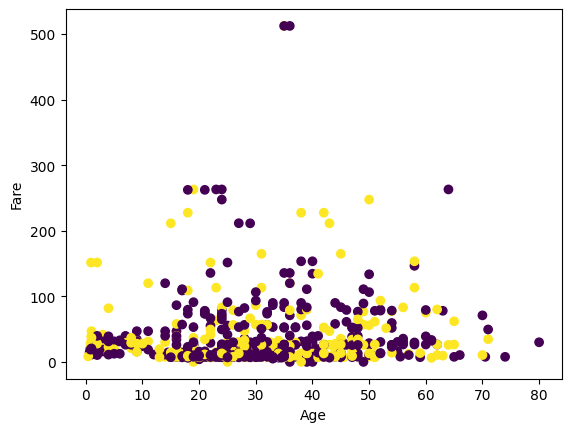

In [20]:
plt.scatter(titanic_passengers['Age'], titanic_passengers['Fare'], c=titanic_passengers['Survived'])

plt.xlabel('Age')
plt.ylabel('Fare')

### Seaborn
Деректерді визуализациялауға арналған тағы бір пайдалы кітапхана --- Seaborn.

In [21]:
import seaborn as sns

#### Pairplot

Pairplot мүмкіндігі барлық сандық динамик жұптары үшін жоғарыда Scatter көмегімен құрастырған визуализацияларды бірден алуға мүмкіндік береді.

Pairplot құжаттамасы: https://seaborn.pydata.org/generated/seaborn.pairplot.html

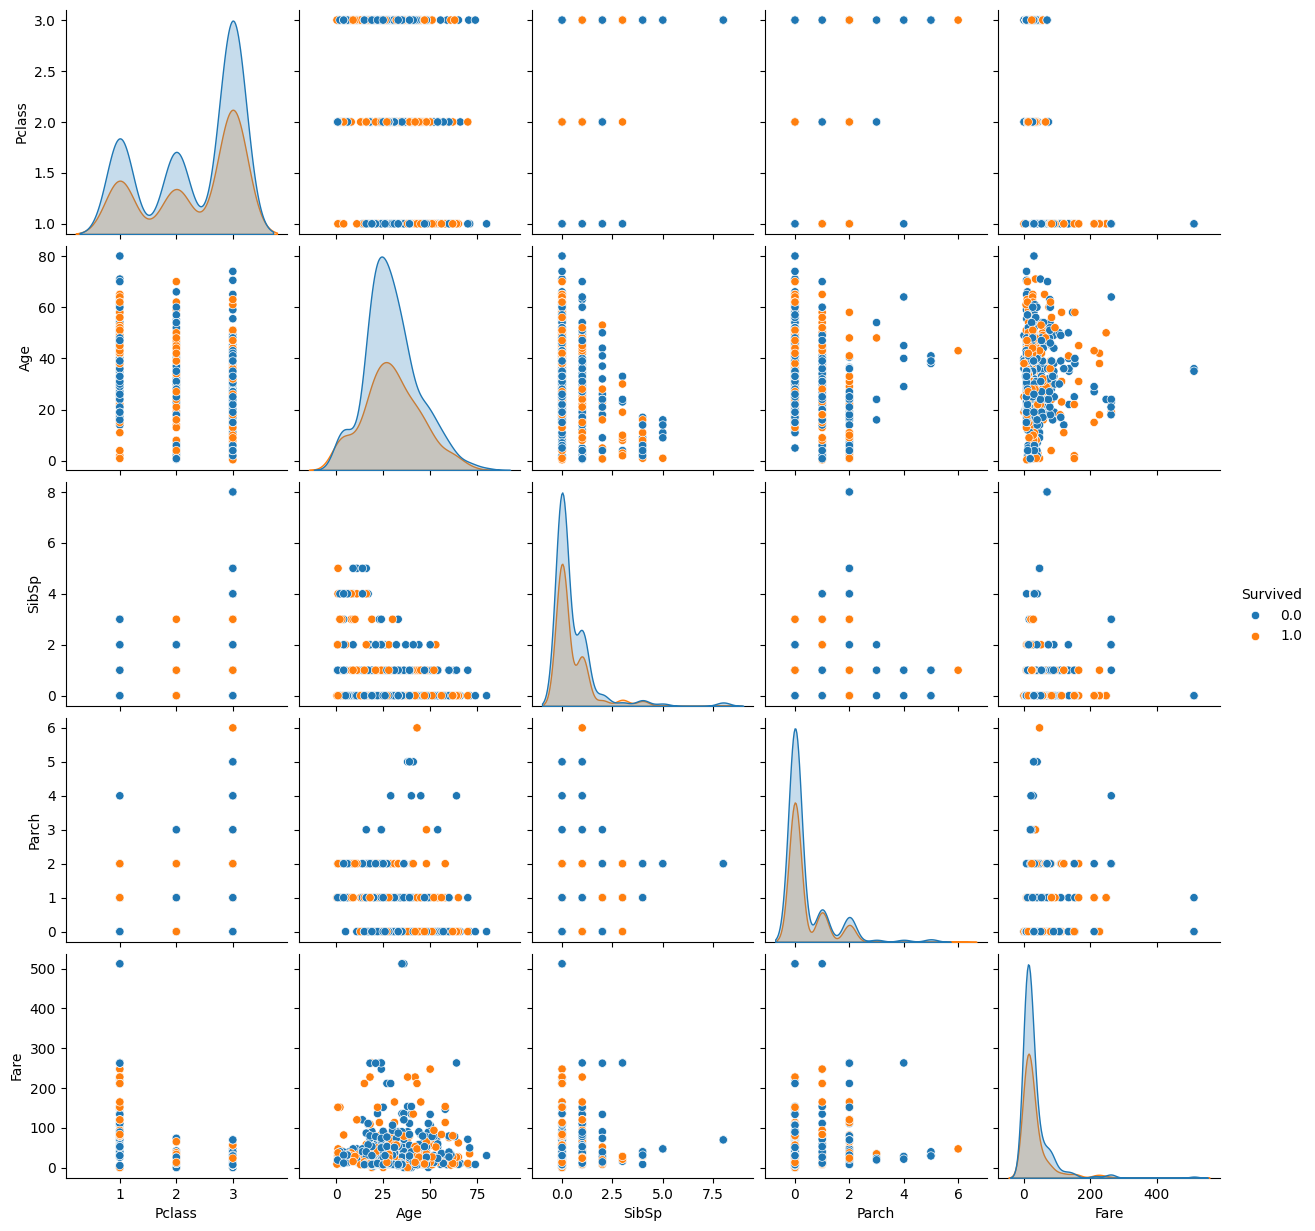

In [22]:
sns.pairplot(titanic_passengers, hue="Survived")

#### Корреляция матрицасы

Пандаста барлық сандық белгілердің өзара корреляция коэффициенттерінің матрицасын оңай алуға болады:

In [27]:
titanic = titanic_passengers[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
titanic.corr()

,Pclass,Age,SibSp,Parch,Fare,Survived
Pclass,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.010254
Age,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.003541
SibSp,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.012716
Parch,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.016198
Fare,-0.549500,0.096067,0.159651,0.216225,1.000000,0.011044
Survived,0.010254,-0.003541,-0.012716,-0.016198,0.011044,1.000000


Seaborn кітапханасының heatmap функциясының көмегімен сіз бұл матрицаны визуализациялай аласыз.

Heatmap құжаттамасы: https://seaborn.pydata.org/generated/seaborn.heatmap.html

<Axes: >

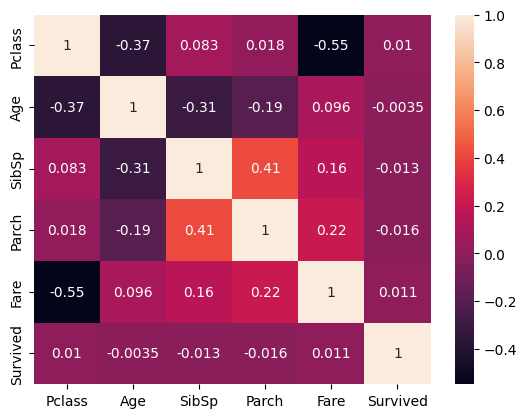

In [28]:
sns.heatmap(titanic.corr(), annot=True)

#### Кері санақ ``countplot``
Seaborn-дағы тағы бір пайдалы функция countplot деп аталады. Countplot құжаттамасы: https://seaborn.pydata.org/generated/seaborn.countplot.html

In [29]:
sns.countplot(titanic_passengers['Pclass'], hue=titanic_passengers["Survived"])

ValueError: The following variable cannot be assigned with wide-form data: `hue`

Countplot бірегей мәндері көп емес бағандарға қолдану қисынды. Мысалы, Countplot көмегімен Age динамигінің визуализациясы қалай көрінеді: өте Ақпараттық емес.

In [ ]:
sns.countplot(titanic_passengers['Age'], hue=titanic_passengers["Survived"])